# **Normality Testing: TSX Stock Returns**    



This notebook calculates the daily returns of the companies in the TSX and tests whether the simple daily returns are normally distributed. A normally distributed dataset is symmetric around the mean and follows the shape of a bell curve. If daily returns are normally distributed, we can expect the returns that are near around the mean to be more likely to happen than returns that are farther from the mean. 


There are two approaches to test for normality: visual and numerical. This notebook will use both methods. 


The below function will first output the visual tests which are: histogram, boxplot and Q-Q plot. If the returns follow a normal distribution, the histogram will follow a symmetric bell curve. The boxplot is useful to visualize the outliers which are the black circles. The Q-Q plot shows a red line which is the "normal distribution". If the blue dots deviate from the red line, the dataset is not normally distributed.    


For the numerical tests, the function will output the p-value of the Jarque Bera and Shapiro Wilk tests. The Jarque Bera test works best with a large dataset (minimum 2000 points). It checks for skewness and kurtosis. The null hypothesis is that the data is normally distributed. If the p-value results to be less than .05, we will have to reject the null hypothesis as there is enough evidence that the data doesn’t follow a normal distribution. The Shapiro Wilk test’s null hypothesis is that the data follows a normally distribution as well. If the p-value is less than .05, we will have to reject the null and say that there's enough evidence that the data is not normally distributed. 

In [1]:
#Import libraries 

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
from scipy.stats import jarque_bera

In [2]:
#Define function that inputs the ticker. The function will return a histogram, boxplot, Q-Q plot, p-value of Jarque Bera
#test, and p-value of Shapiro Wilk test. 

def normality_test(symbol):
    
    ticker = yf.Ticker(symbol)
    
    hist = ticker.history(period = 'max')
    
    df = pd.DataFrame(hist['Close'])
    df.dropna(inplace = True)
    df['diff'] = df['Close'].diff()
    df['return'] = df['diff'] / df['Close']
    df.dropna(inplace = True)
    
    print('Histogram')
    plot1 = plt.hist(df['return'])
    plt.show(plot1)
    
    print('************************************************************************************************')
    
    print('Boxplot')
    plot2 = plt.boxplot(df['return'],vert = False)
    plt.show()
    
    print('************************************************************************************************')
    
    print('Q-Q Plot')
    plot3 = stats.probplot(df['return'], dist = 'norm',plot = pylab)
    plt.show()
    
    print('************************************************************************************************')
    
    print('Jarque Bera Test')
    jb = jarque_bera(df['return'])
    print('Number of values: ',len(df))
    print('statistic: ',jb[0])
    print('p-value: ',jb[1])
    
    if jb[1] > .05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')
        
    print('************************************************************************************************')
    
    print('Shapiro Wilk Test')
    sw = stats.kstest(df['return'], 'norm')
    print('statistic :', sw[0])
    print('p-value :', sw[1])
    
    if sw[1] > .05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')

Histogram


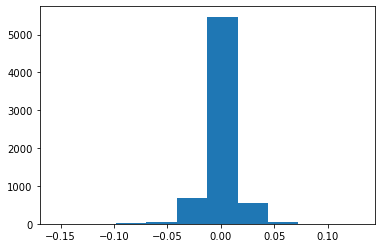

************************************************************************************************
Boxplot


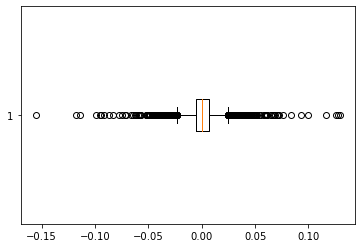

************************************************************************************************
Q-Q Plot


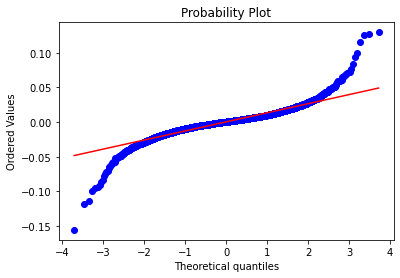

************************************************************************************************
Jarque Bera Test
Number of values:  6799
statistic:  44305.66401269277
p-value:  0.0
Reject null hypothesis
************************************************************************************************
Shapiro Wilk Test
statistic : 0.47638081693752043
p-value : 0.0
Reject null hypothesis


In [3]:
#Call the normality_test function with the ticker as parameter. 
normality_test('RY.TO')

## Results

As per the results, the simple daily returns of the stocks from the TSX don’t follow a normal distribution. The function calculates stock returns since inception and the time horizon is too wide that outliers results in long tails. This can be viewed more clearly in the boxplot as the black circles are the outliers. Outliers or random sharp changes in stock prices make the distribution asymmetric. 


Further analysis of returns and normal distribution can be done with a transformed dataset such as log transformation.